## Hierarchical Clustering:
* Agglomerative: Bottom-up approach. Initially, each point is a cluster, then merged later.
* Divisive: Top-bottom approach. Initially, there is only one cluster, then separated later.
#### Agglomertive Clustering<br>
* Make each point a single cluster
* Take two closest points and merge them in one cluster.
* Repeat step 2 till only one cluster left.
* While choosing the closest points, there are multiple ways to g <p>

Take the distance of two closest point in clusters
* Average distance
* Centroid distance
* Farthest points etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('my_machine-learning/datasets/iris.csv')

X = df.iloc[:, [3, 4]].values

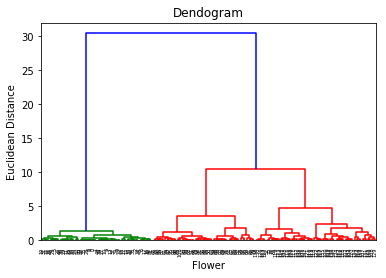

In [25]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward')) # The ward method tries to minimise the variance in each cluster
plt.title('Dendogram')
plt.xlabel('Flower')
plt.ylabel('Euclidean Distance')
plt.show()

* Here we get 3 clusters by dendogram
* Height in dendrogram at which two clusters are merged represents distance between two clusters in data space

In [14]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

The decision of merging two clusters is taken on the basis of closeness of these clusters.
* Euclidean distance: ||a-b||^2 = √(Σ(ai-bi))
* Squared Euclidean distance: ||a-b||^2 = Σ((ai-bi)^2)
* Manhattan distance: ||a-b|| = Σ|ai-bi|
* Maximum distance:||a-b||INFINITY = maxi|ai-bi|

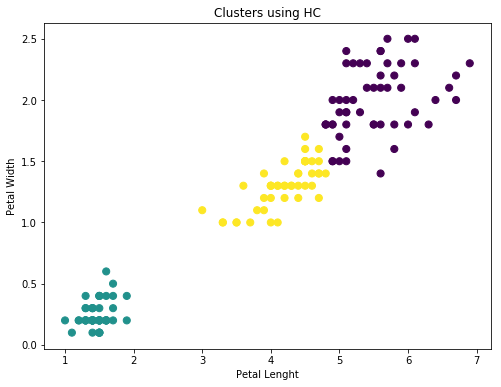

In [26]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=50, cmap='viridis')

plt.title('Clusters using HC')
plt.ylabel('Petal Width')
plt.xlabel('Petal Lenght')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
columns = ['Species']

def encoder(df):
    for col in columns:
        label_encoder = LabelEncoder()
        label_encoder.fit(df[col])
        df[col] = label_encoder.transform(df[col])
    return df

In [20]:
df = encoder(df)

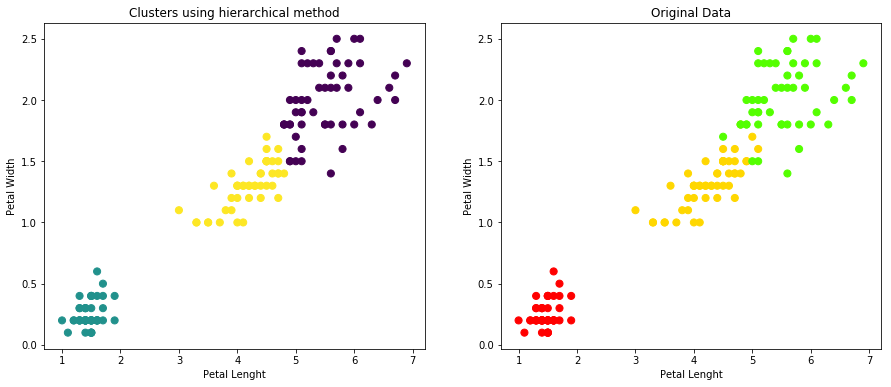

In [27]:
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=50, cmap='viridis')
plt.title('Clusters using hierarchical method')
plt.ylabel('Petal Width')
plt.xlabel('Petal Lenght')

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=df.iloc[:,5].values, s=50, cmap='prism')
plt.title('Original Data')
plt.ylabel('Petal Width')
plt.xlabel('Petal Lenght')
plt.show()

## Disadvantage

HC is computionally expensive O(N^2Log(N)) hence is not recommended on huge datasets whereas k means using linear time